In [1]:
# Load all helper functions
%run -i '../util/helper.py'

# Load and Split Data

In [2]:
# load dataset
df  = pd.read_csv('../Dataset/brazilian_ecommerce_encoded.csv')

#split dataset in features and target variable
y = df["is_delayed"]
X = df.drop(["is_delayed", "Unnamed: 0.2"], axis=1, inplace=False)

In [3]:
# split X and y into training and testing sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, random_state=random_state, test_size=0.2, stratify=y)

In [4]:
print(X_dev.shape)
print(X_test.shape)

(92506, 29)
(23127, 29)


# Hyperparameter Tuning

## Stratified Sampling

### GridSearch

In [10]:
start3 = time()

parameter_grid = {'classifier__n_estimators': [230, 250, 270, 300], 
                  'classifier__max_depth':[20, 23, 25, 27, 30] , 
                  'classifier__warm_start': [True]}

pipe_randomforest_tune = Pipeline([('classifier', RandomForestClassifier(random_state=random_state))])
# randomForestClf = RandomForestClassifier(random_state = random_state)


pipe_randomforest = make_pipeline(GridSearchCV(estimator=pipe_randomforest_tune,
                                               param_grid=parameter_grid,
                                               return_train_score=True,
                                               cv=StratifiedKFold(n_splits=10, shuffle=False), 
                                               scoring=['recall','f1'],
                                               refit='f1',
                                               verbose=5))

pipe_randomforest.fit(X_dev, np.ravel(y_dev))
end3 = time()
print("Random Forest model takes " + str(end3-start3) + " seconds")
print("The performance of the Random Forest model on test data is ", pipe_randomforest.score(X_test, y_test))
grid_search_rf= pipe_randomforest.named_steps["gridsearchcv"]
print("The Random Forest model Best hyperparameters are {} ".format(grid_search_rf.best_params_))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10] END classifier__max_depth=20, classifier__n_estimators=230, classifier__warm_start=True; f1: (train=0.885, test=0.421) recall: (train=0.794, test=0.278) total time=  29.1s
[CV 2/10] END classifier__max_depth=20, classifier__n_estimators=230, classifier__warm_start=True; f1: (train=0.885, test=0.434) recall: (train=0.794, test=0.291) total time=  28.7s
[CV 3/10] END classifier__max_depth=20, classifier__n_estimators=230, classifier__warm_start=True; f1: (train=0.882, test=0.467) recall: (train=0.789, test=0.320) total time=  28.5s
[CV 4/10] END classifier__max_depth=20, classifier__n_estimators=230, classifier__warm_start=True; f1: (train=0.887, test=0.439) recall: (train=0.798, test=0.297) total time=  29.2s
[CV 5/10] END classifier__max_depth=20, classifier__n_estimators=230, classifier__warm_start=True; f1: (train=0.884, test=0.447) recall: (train=0.793, test=0.304) total time=  29.0s
[CV 6/10] END classifier__m

[CV 6/10] END classifier__max_depth=23, classifier__n_estimators=230, classifier__warm_start=True; f1: (train=0.959, test=0.477) recall: (train=0.922, test=0.328) total time=  31.1s
[CV 7/10] END classifier__max_depth=23, classifier__n_estimators=230, classifier__warm_start=True; f1: (train=0.960, test=0.460) recall: (train=0.922, test=0.316) total time=  30.6s
[CV 8/10] END classifier__max_depth=23, classifier__n_estimators=230, classifier__warm_start=True; f1: (train=0.961, test=0.482) recall: (train=0.924, test=0.337) total time=  30.0s
[CV 9/10] END classifier__max_depth=23, classifier__n_estimators=230, classifier__warm_start=True; f1: (train=0.956, test=0.463) recall: (train=0.916, test=0.324) total time=  30.0s
[CV 10/10] END classifier__max_depth=23, classifier__n_estimators=230, classifier__warm_start=True; f1: (train=0.956, test=0.491) recall: (train=0.916, test=0.346) total time=  30.5s
[CV 1/10] END classifier__max_depth=23, classifier__n_estimators=250, classifier__warm_st

[CV 1/10] END classifier__max_depth=25, classifier__n_estimators=250, classifier__warm_start=True; f1: (train=0.987, test=0.436) recall: (train=0.975, test=0.291) total time=  33.0s
[CV 2/10] END classifier__max_depth=25, classifier__n_estimators=250, classifier__warm_start=True; f1: (train=0.987, test=0.466) recall: (train=0.975, test=0.320) total time=  33.0s
[CV 3/10] END classifier__max_depth=25, classifier__n_estimators=250, classifier__warm_start=True; f1: (train=0.987, test=0.490) recall: (train=0.975, test=0.343) total time=  33.1s
[CV 4/10] END classifier__max_depth=25, classifier__n_estimators=250, classifier__warm_start=True; f1: (train=0.989, test=0.439) recall: (train=0.978, test=0.297) total time=  33.5s
[CV 5/10] END classifier__max_depth=25, classifier__n_estimators=250, classifier__warm_start=True; f1: (train=0.986, test=0.475) recall: (train=0.973, test=0.330) total time=  33.2s
[CV 6/10] END classifier__max_depth=25, classifier__n_estimators=250, classifier__warm_sta

[CV 6/10] END classifier__max_depth=27, classifier__n_estimators=250, classifier__warm_start=True; f1: (train=0.996, test=0.481) recall: (train=0.992, test=0.331) total time=  33.7s
[CV 7/10] END classifier__max_depth=27, classifier__n_estimators=250, classifier__warm_start=True; f1: (train=0.998, test=0.467) recall: (train=0.995, test=0.324) total time=  33.3s
[CV 8/10] END classifier__max_depth=27, classifier__n_estimators=250, classifier__warm_start=True; f1: (train=0.997, test=0.487) recall: (train=0.995, test=0.344) total time=  33.3s
[CV 9/10] END classifier__max_depth=27, classifier__n_estimators=250, classifier__warm_start=True; f1: (train=0.997, test=0.482) recall: (train=0.995, test=0.340) total time=  33.1s
[CV 10/10] END classifier__max_depth=27, classifier__n_estimators=250, classifier__warm_start=True; f1: (train=0.996, test=0.505) recall: (train=0.993, test=0.357) total time=  33.4s
[CV 1/10] END classifier__max_depth=27, classifier__n_estimators=270, classifier__warm_st

[CV 1/10] END classifier__max_depth=30, classifier__n_estimators=270, classifier__warm_start=True; f1: (train=1.000, test=0.447) recall: (train=1.000, test=0.301) total time=  35.8s
[CV 2/10] END classifier__max_depth=30, classifier__n_estimators=270, classifier__warm_start=True; f1: (train=1.000, test=0.460) recall: (train=0.999, test=0.313) total time=  35.9s
[CV 3/10] END classifier__max_depth=30, classifier__n_estimators=270, classifier__warm_start=True; f1: (train=1.000, test=0.485) recall: (train=0.999, test=0.339) total time=  35.9s
[CV 4/10] END classifier__max_depth=30, classifier__n_estimators=270, classifier__warm_start=True; f1: (train=1.000, test=0.447) recall: (train=1.000, test=0.305) total time=  36.0s
[CV 5/10] END classifier__max_depth=30, classifier__n_estimators=270, classifier__warm_start=True; f1: (train=1.000, test=0.469) recall: (train=0.999, test=0.325) total time=  36.0s
[CV 6/10] END classifier__max_depth=30, classifier__n_estimators=270, classifier__warm_sta

In [31]:
# randomForestClf = RandomForestClassifier(random_state = random_state,
#                                          max_depth= 27,
#                                          n_estimators= 300,
#                                          warm_start= True)

# randomForestClf.fit(X_dev, np.ravel(y_dev))
# randomforest_prediction_clf = randomForestClf.predict(X_test)

# print('F-1 Score: {}'.format(f1_score(y_test,randomforest_prediction_clf)))

F-1 Score: 0.4950657894736843


In [32]:
# filename = '../model/RandomForest_stratified_clf.sav'
# pickle.dump(randomForestClf, open(filename, 'wb'))

### Evaluate on Test Set

In [11]:
randomforest_prediction = pipe_randomforest.predict(X_test)

print('Accuracy: {}'.format(accuracy_score(y_test,randomforest_prediction)))
print('Recall: {}'.format(recall_score(y_test,randomforest_prediction)))
print('Precision: {}'.format(precision_score(y_test,randomforest_prediction)))
print('F-1 Score: {}'.format(f1_score(y_test,randomforest_prediction)))

recall, precision = recall_score(y_test, randomforest_prediction), precision_score(y_test, randomforest_prediction)

Accuracy: 0.9469018895663078
Recall: 0.3453815261044177
Precision: 0.8737300435413643
F-1 Score: 0.4950657894736843


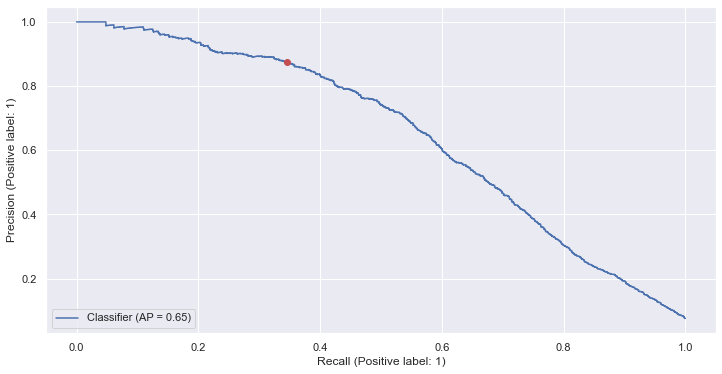

In [12]:
probs = pipe_randomforest.predict_proba(X_test)[:,1]
PrecisionRecallDisplay.from_predictions(y_test, probs)
plt.plot(recall, precision,'ro');

Area under the AUC curve is 0.904581006404969


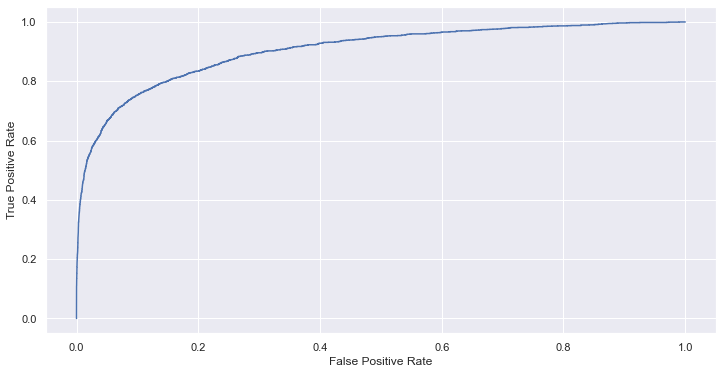

In [14]:
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label = 1)
disp = RocCurveDisplay(fpr = fpr, tpr = tpr)
disp.plot()

print("Area under the AUC curve is {}".format(roc_auc_score(y_test, probs)))

### Feature Importances

Text(0.5, 1.0, 'Feature Importance')

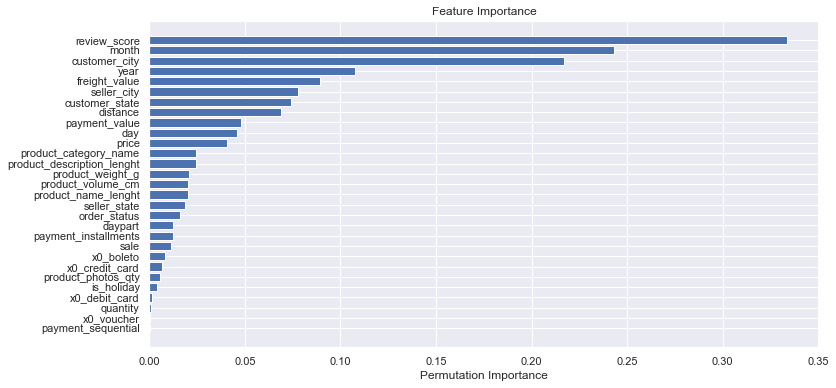

In [15]:
perm_importance = permutation_importance(pipe_randomforest, X_test, y_test)

feature_names = X.columns
feat_imp = perm_importance.importances_mean
sorted_idx = feat_imp.argsort()
plt.barh(feature_names[sorted_idx], feat_imp[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")

In [24]:
filename = '../model/RandomForest_stratified.sav'
pickle.dump(pipe_randomforest[0].best_estimator_, open(filename, 'wb'))

# Downsampling

In [28]:
rus = RandomUnderSampler(replacement=False, random_state=random_state)
X_dev_us, y_dev_us = rus.fit_resample(X_dev, y_dev)

### GridSearch

In [33]:
start3 = time()

parameter_grid = {'classifier__n_estimators': [230, 250, 270, 300], 
                  'classifier__max_depth':[20, 23, 25, 27, 30] , 
                  'classifier__warm_start': [True]}

pipe_randomforest_tune = Pipeline([('classifier', RandomForestClassifier(random_state=random_state))])
# randomForestClf = RandomForestClassifier(random_state = random_state)


pipe_randomforest_rus = make_pipeline(GridSearchCV(estimator=pipe_randomforest_tune,
                                               param_grid=parameter_grid,
                                               return_train_score=True,
                                               cv=StratifiedKFold(n_splits=10,shuffle=False),
                                               n_jobs=-1, 
                                               scoring=['recall','f1'],
                                               refit='f1',
                                               verbose=5))

pipe_randomforest_rus.fit(X_dev_us, np.ravel(y_dev_us))
end3 = time()
print("Random Forest model takes " + str(end3-start3) + " seconds")
print("The performance of the Random Forest model on test data is ", pipe_randomforest_rus.score(X_test, y_test))
grid_search_rf= pipe_randomforest_rus.named_steps["gridsearchcv"]
print("The Random Forest model Best hyperparameters are {} ".format(grid_search_rf.best_params_))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Random Forest model takes 251.16333889961243 seconds
The performance of the Random Forest model on test data is  0.4206278026905829
The Random Forest model Best hyperparameters are {'classifier__max_depth': 23, 'classifier__n_estimators': 250, 'classifier__warm_start': True} 


### Evaluate on the Test Set

In [34]:
randomforest_prediction_rus = pipe_randomforest_rus.predict(X_test)

print('Accuracy: {}'.format(accuracy_score(y_test,randomforest_prediction_rus)))
print('Recall: {}'.format(recall_score(y_test,randomforest_prediction_rus)))
print('Precision: {}'.format(precision_score(y_test,randomforest_prediction_rus)))
print('F-1 Score: {}'.format(f1_score(y_test,randomforest_prediction_rus)))

recall, precision = recall_score(y_test, randomforest_prediction_rus), precision_score(y_test, randomforest_prediction_rus)



Accuracy: 0.8324036840057076
Recall: 0.8072289156626506
Precision: 0.28441479684657367
F-1 Score: 0.4206278026905829


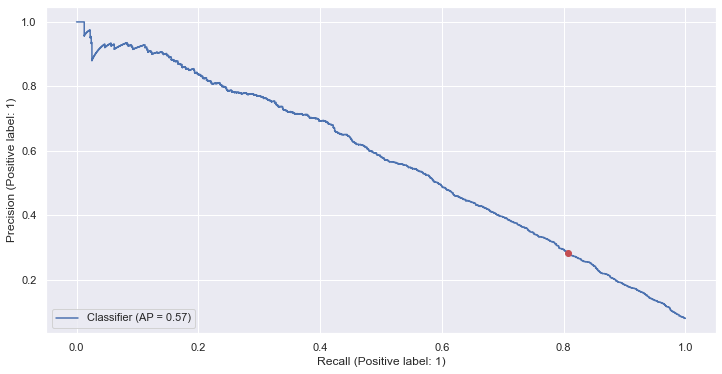

In [35]:
probs = pipe_randomforest_rus.predict_proba(X_test)[:,1]
PrecisionRecallDisplay.from_predictions(y_test, probs)
plt.plot(recall,precision,'ro');

Area under the AUC curve is 0.8978312641297916


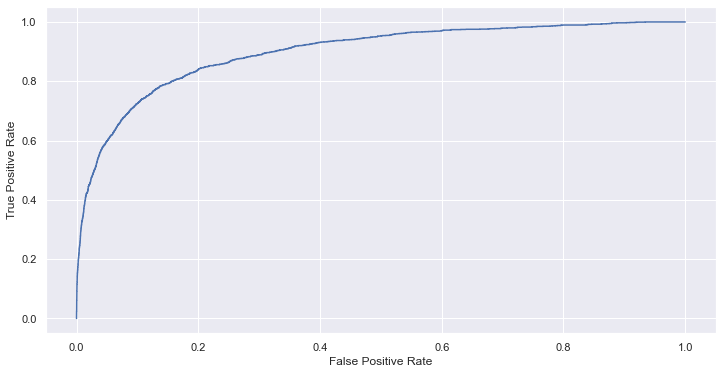

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label = 1)
disp = RocCurveDisplay(fpr = fpr, tpr = tpr)
disp.plot()

print("Area under the AUC curve is {}".format(roc_auc_score(y_test, probs)))

### Feature Importances

In [ ]:
perm_importance = permutation_importance(pipe_randomforest_rus, X_test, y_test)

feature_names = X.columns
feat_imp = perm_importance.importances_mean
sorted_idx = feat_imp.argsort()
plt.barh(feature_names[sorted_idx], feat_imp[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")

In [30]:
filename = '../Model/RandomForest_downsampling.sav'
pickle.dump(pipe_randomforest_rus, open(filename, 'wb'))